In [1]:
import sys
sys.path.append('/home/sardarchitect/repos/github.com/ucsd_capstone/')

In [2]:
from streetstudy.data.virat import get_annotations
from streetstudy.common.display import display_heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [3]:
current_video = '/home/sardarchitect/repos/github.com/ucsd_capstone/virat/videos/VIRAT_S_000006.mp4'
annotations_df = get_annotations(current_video, format='yolo')

In [4]:
annotations_df

,current_frame,object_type,bbox_center_x,bbox_center_y,bbox_width,bbox_height
20406,186,0,0.028,0.696,0.029167,0.122222
20407,187,0,0.029,0.696,0.029687,0.122222
20408,188,0,0.031,0.695,0.030208,0.122222
20409,189,0,0.032,0.694,0.030208,0.122222
20410,190,0,0.034,0.694,0.030729,0.122222
...,...,...,...,...,...,...
44257,16531,0,0.982,0.140,0.020313,0.089815
44258,16532,0,0.983,0.139,0.020313,0.089815
44259,16533,0,0.983,0.139,0.019792,0.089815
44260,16534,0,0.984,0.139,0.019271,0.088889


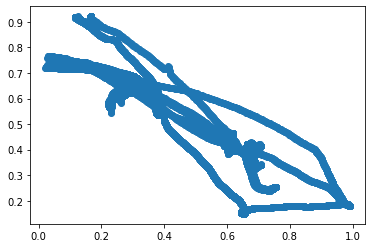

In [5]:
x = annotations_df['bbox_center_x']
y = annotations_df['bbox_center_y'] + (annotations_df['bbox_height'] / 2)
plt.scatter(x, y)

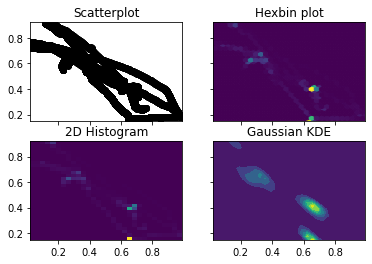

In [6]:
# Generate 200 correlated x,y points
nbins = 30

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)

axes[0, 0].set_title('Scatterplot')
axes[0, 0].plot(x, y, 'ko')

axes[0, 1].set_title('Hexbin plot')
axes[0, 1].hexbin(x, y, gridsize=nbins)

axes[1, 0].set_title('2D Histogram')
axes[1, 0].hist2d(x, y, bins=nbins)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde((x,y))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axes[1, 1].set_title('Gaussian KDE')
# axes[1, 1].pcolormesh(xi, yi, zi.reshape(xi.shape))
axes[1, 1].contourf(xi, yi, zi.reshape(xi.shape))

plt.show()

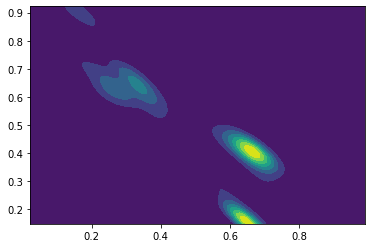

In [7]:
nbins = 150

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde((x,y))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# axes[1, 1].pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.contourf(xi, yi, zi.reshape(xi.shape))

plt.show()

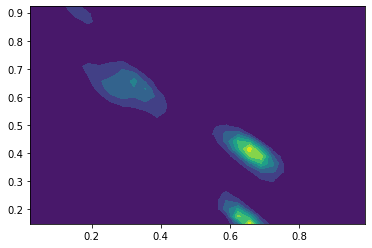

In [8]:
nbins = 30

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde((x,y))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# axes[1, 1].pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.contourf(xi, yi, zi.reshape(xi.shape))

plt.show()

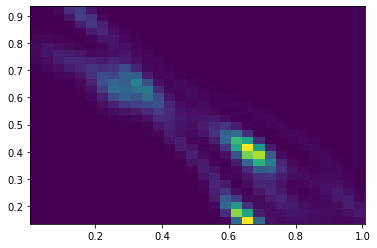

In [9]:
nbins = 30

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde((x,y))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
# plt.contourf(xi, yi, zi.reshape(xi.shape))

plt.show()

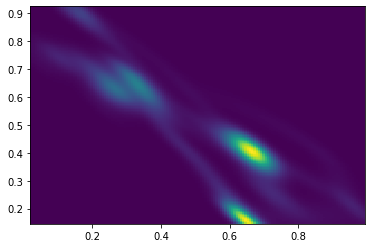

In [10]:
nbins = 150

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde((x,y))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
# plt.contourf(xi, yi, zi.reshape(xi.shape))

plt.show()

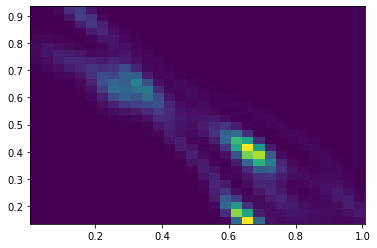

In [11]:
display_heatmap(x, y)